## Predict Coca Cola Stock Prices for the next 365 days using Prophet model

In [1]:
# Import the libraries
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

In [2]:
# Try importing Prophet
try:
    from prophet import Prophet
except ImportError:
    from fbprophet import Prophet

In [3]:
data = yf.download(tickers="KO", start="1962-01-02", end="2025-12-10")
data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,KO,KO,KO,KO,KO
Date,,,,,
1962-01-02,0.045052,0.046279,0.045052,0.045052,806400
1962-01-03,0.044048,0.044383,0.043379,0.044383,1574400
1962-01-04,0.044383,0.044717,0.044160,0.044160,844800
1962-01-05,0.043379,0.044940,0.043268,0.044383,1420800
1962-01-08,0.042933,0.043045,0.042097,0.043045,2035200
...,...,...,...,...,...
2025-12-03,70.809998,71.400002,70.610001,70.879997,17001700
2025-12-04,70.449997,71.339996,70.370003,70.830002,17710000


In [4]:
cols = []
for i, j in enumerate(data.columns):
    cols.append(j[0])
cols

['Close', 'High', 'Low', 'Open', 'Volume']

In [5]:
data.columns = cols

data

,Close,High,Low,Open,Volume
Date,,,,,
1962-01-02,0.045052,0.046279,0.045052,0.045052,806400
1962-01-03,0.044048,0.044383,0.043379,0.044383,1574400
1962-01-04,0.044383,0.044717,0.044160,0.044160,844800
1962-01-05,0.043379,0.044940,0.043268,0.044383,1420800
1962-01-08,0.042933,0.043045,0.042097,0.043045,2035200
...,...,...,...,...,...
2025-12-03,70.809998,71.400002,70.610001,70.879997,17001700
2025-12-04,70.449997,71.339996,70.370003,70.830002,17710000
2025-12-05,70.000000,70.709999,69.870003,70.320000,13978200


In [6]:
df = data.reset_index()

In [7]:
df

,Date,Close,High,Low,Open,Volume
0,1962-01-02,0.045052,0.046279,0.045052,0.045052,806400
1,1962-01-03,0.044048,0.044383,0.043379,0.044383,1574400
2,1962-01-04,0.044383,0.044717,0.044160,0.044160,844800
3,1962-01-05,0.043379,0.044940,0.043268,0.044383,1420800
4,1962-01-08,0.042933,0.043045,0.042097,0.043045,2035200
...,...,...,...,...,...,...
16088,2025-12-03,70.809998,71.400002,70.610001,70.879997,17001700
16089,2025-12-04,70.449997,71.339996,70.370003,70.830002,17710000
16090,2025-12-05,70.000000,70.709999,69.870003,70.320000,13978200
16091,2025-12-08,70.250000,70.379997,69.489998,69.839996,17775100


In [8]:
# Function to prepare data for Prophet
def prepare_prophet_frame(hist_df):
    # Create an empty dataframe
    df = pd.DataFrame()
    
    # Convert the "Date" column to a datetime, handle errors, set UTC, then remove the timezone
    df['ds'] = pd.to_datetime(hist_df['Date'], errors="coerce", utc=True).dt.tz_convert(None)

    # Choose 'Adj Close' if available otherwise fallback to 'Close'
    price_col = "Adj Close" if "Adj Close" in hist_df.columns else "Close"

    # Choose price column and add it to new column 'y'
    df['y'] = hist_df[price_col]

    # Drop rows with missing values in 'ds' or 'y'
    df = df.dropna(subset=['ds', 'y'])

    # Return the prepared dataframe
    return df    

In [9]:
# Function to train the Prophet model 
def train_prophet_model(df):
    # Create a Prophet model instance
    model = Prophet(
        daily_seasonality = False,
        weekly_seasonality = True,
        yearly_seasonality = True,
        seasonality_mode = "additive"
    )

    # Fit/train the model to dataframe
    model.fit(df)

    return model

In [10]:
# Function to forecast future values
def make_future_forecast(model, periods=365, freq="D"):
    # Create future dataframe with specified periods (365 days) and frequency
    future = model.make_future_dataframe(periods=periods,
                                        freq=freq)
    # Generate forecast predictions
    forecast = model.predict(future)
    return future, forecast

In [11]:
def plot_forecast(model, forecast, title = "Stock Prophet Forecast"):
    fig1 = model.plot(forecast)
    plt.title(title)
    plt.ylabel('Price (USD)')
    plt.xlabel('Date')
    plt.tight_layout()

    # Plot forecast components (trend, seasonality)
    fig2 = model.plot_components(forecast)
    plt.tight_layout()
    plt.show()

In [12]:
# Load the data
hist = df.copy()

# Prepare the data
df = prepare_prophet_frame(hist)

df

,ds,y
0,1962-01-02,0.045052
1,1962-01-03,0.044048
2,1962-01-04,0.044383
3,1962-01-05,0.043379
4,1962-01-08,0.042933
...,...,...
16088,2025-12-03,70.809998
16089,2025-12-04,70.449997
16090,2025-12-05,70.000000
16091,2025-12-08,70.250000


14:34:54 - cmdstanpy - INFO - Chain [1] start processing
14:35:10 - cmdstanpy - INFO - Chain [1] done processing


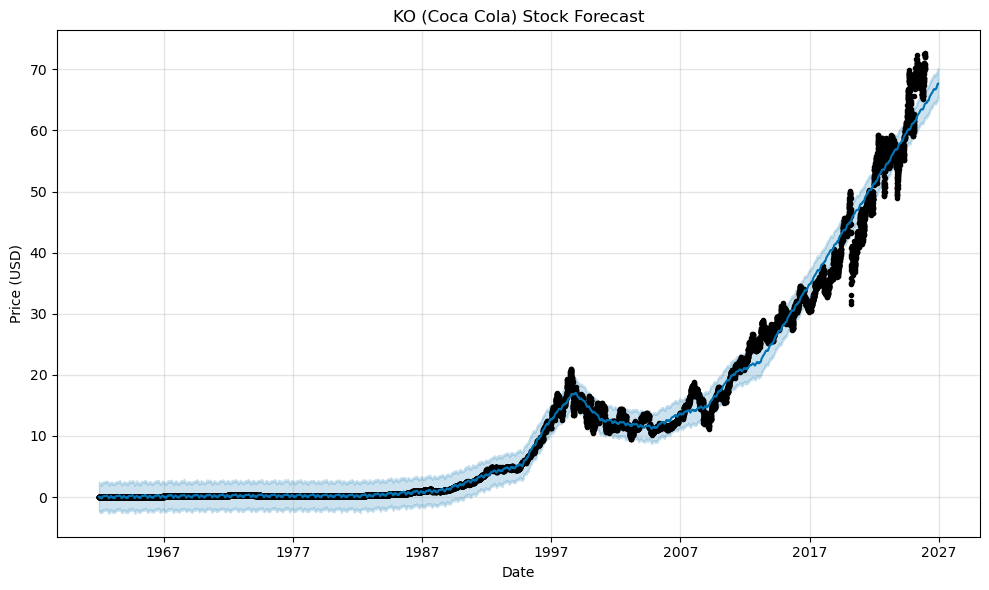

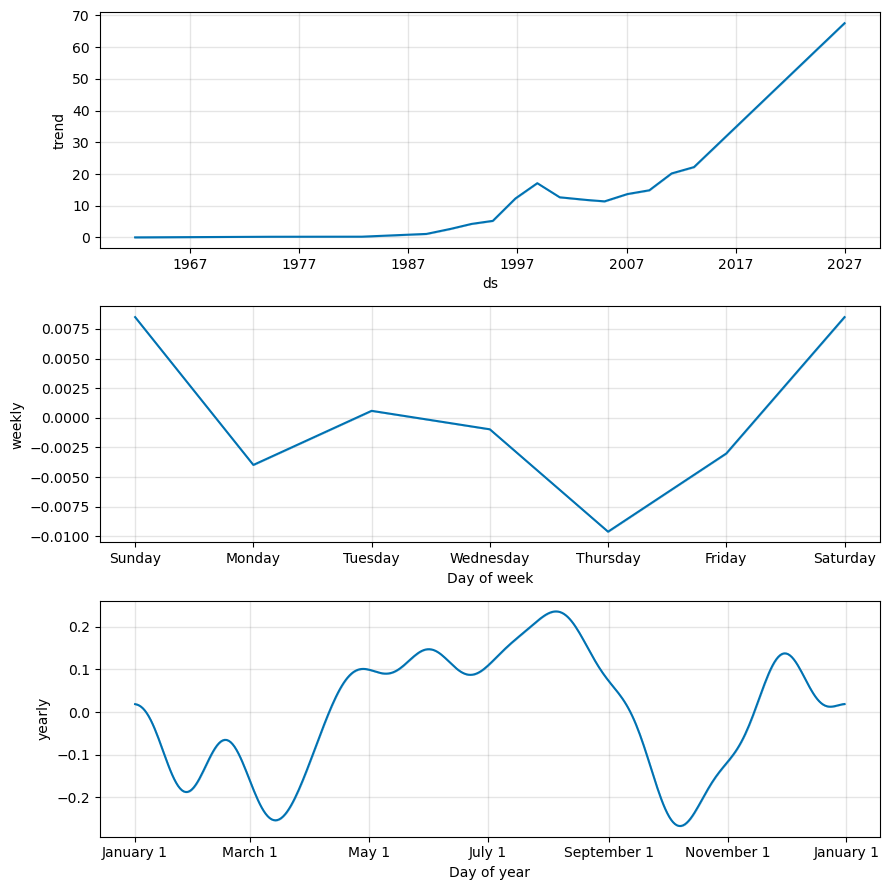

              ds       yhat  yhat_lower  yhat_upper
16448 2026-11-30  67.617126   65.527296   69.825816
16449 2026-12-01  67.630906   65.242553   70.119827
16450 2026-12-02  67.637125   65.341709   70.002911
16451 2026-12-03  67.634884   65.491610   70.037760
16452 2026-12-04  67.646602   65.313147   69.885881
16453 2026-12-05  67.662053   65.245310   69.956613
16454 2026-12-06  67.664947   65.308891   69.928157
16455 2026-12-07  67.654470   65.213808   70.029207
16456 2026-12-08  67.660320   65.468590   70.140758
16457 2026-12-09  67.659502   65.364418   70.135244
Saved Forecast to CSV File


In [14]:
# Train the model
model = train_prophet_model(df)

# Forecast next 365 days
future, forecast = make_future_forecast(model, periods=365)

# Plot the forecast
plot_forecast(model, forecast, title="KO (Coca Cola) Stock Forecast")

# Print the last 10 forecasted rows
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))

# Save the forecast to a CSV File
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("KO_forecast.csv", index=False)
print("Saved Forecast to CSV File")